<a href="https://colab.research.google.com/github/jpivato00/M18_EBAC/blob/main/EDA_(Exploratory_Data_Analysis)_J_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Projeto
Caderno de **Informações**<br>
Aluna: Juliana Pivato

Professor [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)

---

# **Tópicos**

<ol type="1">
  <li>Criação da tabela e algumas queries;</li>
  <li>Links utéis;</li>
  <li>Dicas de livros, podcasts e outros;</li>
</ol>

# O PROJETO

Observação: Não há necessidade de entrega de exercício nessa fase.  O que vocês precisam fazer é o projeto!

**Crie um bloco de notas e insira o link do seu projeto para o tutor avaliar!**

Não esqueça de deixar o portfólio público! Você pode postar o link com uma pequena descrição nas suas redes sociais (Facebook, Linkedlin, Twitter, ...), prática altamente recomendável


---

# **1. Criação da tabela e algumas queries**



> **Não há necessidade de entrega**.
Para esses exercícios, utilizaremos os mesmo dados do módulo 3.

As informações de **credito8.csv** estarão disponíveis no material de aula.

Siga os seguintes passos para criação da tabela (desconsidere caso você já tenha os dados no seu S3):

* Crie uma pasta bucket-transacoes no seu S3 e carregue o arquivo **credito8.csv**
* Volta para o AWS Athena e execute o seguinte comando:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION <sua-localizacao>
TBLPROPERTIES ('has_encrypted_data'='false');
```

Utilizaremos a tabela para o projeto.



# **Exploração dos dados**


 - O conjunto de dados possui 2564 linhas, para verificar, é feito o seguinte comando:





Query: SELECT count(*) FROM credito8

In [3]:
import pandas as pd

df = pd.read_csv('/content/query1.csv')
df

,_col0
0,2564


 - Preview da tabela:

Query: SELECT * FROM "default"."credito8" limit 10;

In [4]:
import pandas as pd

df = pd.read_csv('/content/querycredito.csv')
df

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


# Categorias da variável sexo:



Query: SELECT DISTINCT sexo FROM credito

In [5]:
import pandas as pd

df = pd.read_csv('/content/query_sexo.csv')
df

,sexo
0,F
1,M


 -  Tipos de dados:

 Query: DESCRIBE credito8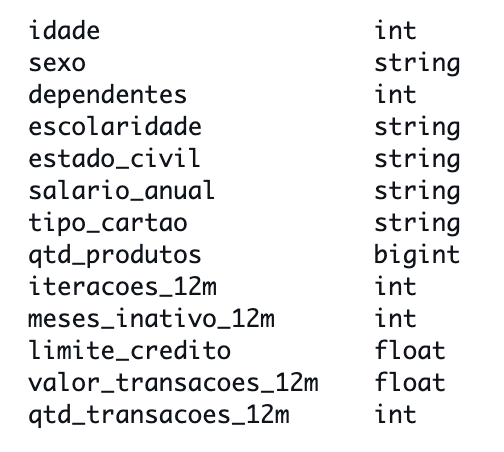;

#  - Categorias da variável escolaridade:



Query: SELECT DISTINCT escolaridade
FROM credito8;

In [6]:
import pandas as pd

df = pd.read_csv('/content/escolaridade.csv')
df

,escolaridade
0,sem educacao formal
1,mestrado
2,graduacao
3,doutorado
4,na
5,ensino medio


# - Categorias da variável estado_civil:



Query: SELECT DISTINCT estado_civil
FROM credito8;

In [7]:
import pandas as pd

df = pd.read_csv('/content/query_estadocivil.csv')
df

,estado_civil
0,divorciado
1,solteiro
2,casado
3,na


Obs.: Nota-se a presença de valores nulos na variável categórica estado_civil.

# - Quantidade de clientes de acordo com o sexo:

Query: SELECT sexo, COUNT(*) AS quantidade FROM credito8 GROUP BY sexo ORDER BY quantidade DESC;

In [15]:
import pandas as pd

df = pd.read_csv('/content/clientes-por-sexo.csv')
df

,sexo,quantidade
0,M,1563
1,F,1001


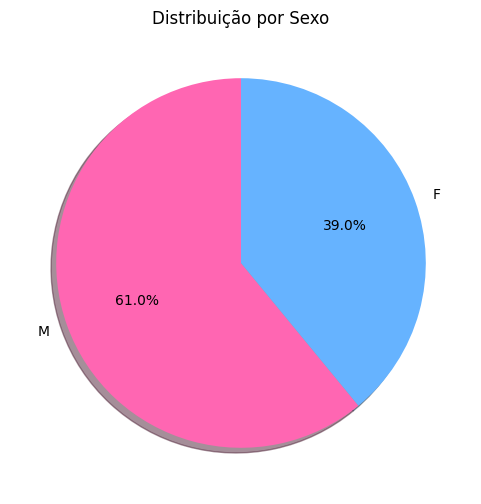

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('clientes-por-sexo.csv')

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(df['quantidade'], labels=df['sexo'], autopct='%1.1f%%',
        colors=['#ff66b2', '#66b3ff'], startangle=90, shadow=True)
plt.title('Distribuição por Sexo')
plt.show()

# Quantidade de clientes em cada faixa salarial:

Query:

SELECT salario_anual,
	COUNT(*) AS quantidade

FROM credito
GROUP BY salario_anual
ORDER BY CASE

    salario_anual
		WHEN 'menos que $40K' THEN 1
		WHEN '$40K - $60K' THEN 2
		WHEN '$60K - $80K' THEN 3
		WHEN '$80K - $120K' THEN 4
		WHEN '$120K +' THEN 5 ELSE 6
	END;

In [10]:
import pandas as pd

df = pd.read_csv('/content/salarioanual.csv')
df

,salario_anual
0,$80K - $120K
1,$60K - $80K
2,$40K - $60K
3,$120K +
4,menos que $40K
5,na


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('salario_anual').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# - Quantidade de cliente por tipo de cartão:

Query: SELECT tipo_cartao,
	COUNT(*) AS quantidade
FROM credito8
GROUP BY tipo_cartao
ORDER BY quantidade DESC;

In [20]:
import pandas as pd

df = pd.read_csv('/content/quantidade-cliente-por-cartao.csv')
df

,tipo_cartao,quantidade
0,blue,2453
1,silver,93
2,gold,16
3,platinum,2


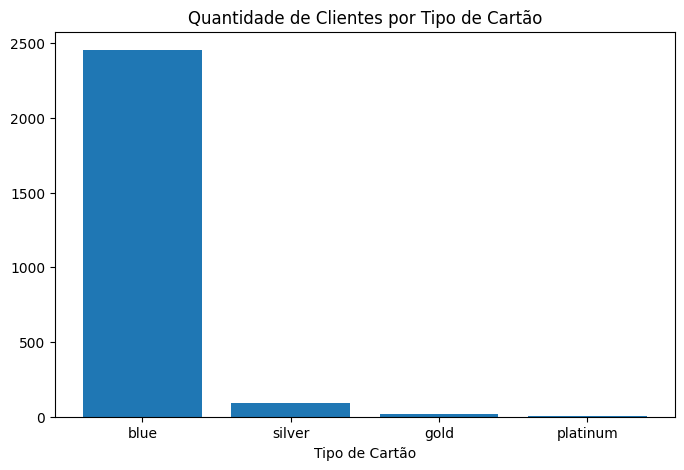

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('quantidade-cliente-por-cartao.csv')


plt.figure(figsize=(8, 5))
plt.bar(df['tipo_cartao'], df['quantidade']) #color=['blue', 'silver', 'gold', 'platinum'])


plt.xlabel('Tipo de Cartão')
#plt.ylabel('Quantidade de Clientes')
plt.title('Quantidade de Clientes por Tipo de Cartão')



plt.show()

# - Análise da idade dos clientes (média, mínima e máxima):

Query: SELECT ROUND(AVG(idade)) AS idade_media,
	MIN(idade) AS idade_minima,
	MAX(idade) AS idade_maxima
FROM credito8;

In [32]:
import pandas as pd

df = pd.read_csv('/content/analise_idade_cliente_.csv')
df

,idade_media,idade_minima,idade_maxima
0,46.0,26,73


# - Análise dos gastos dos clientes (média, mínima e máxima):

Query: SELECT ROUND(AVG(valor_transacoes_12m), 2) AS valor_medio_transacoes,
	MIN(valor_transacoes_12m) AS valor_minimo_transacoes,
	MAX(valor_transacoes_12m) AS valor_maximo_transacoes
FROM credito8;

In [33]:
import pandas as pd

df = pd.read_csv('/content/analise_transacoes.csv')
df

,valor_medio_transacoes,valor_minimo_transacoes,valor_maximo_transacoes
0,1820.33,510.16,4776.58


# - Análise da quantidade e valores das transações de acordo com o sexo e estado civil:

Query: SELECT COUNT(*) AS quantidade,
	sexo,
	estado_civil,
	MIN(valor_transacoes_12m) AS valor_minimo_transacoes,
	MAX(valor_transacoes_12m) AS valor_maximo_transacoes,
	AVG(valor_transacoes_12m) AS valor_medio_transacoes
FROM credito8
WHERE estado_civil != 'na'
GROUP BY sexo,
	estado_civil
ORDER BY quantidade ASC;

In [34]:
import pandas as pd

df = pd.read_csv('/content/quantidade-valores-transacoes-tipo.csv')
df

,quantidade,sexo,estado_civil,valor_minimo_transacoes,valor_maximo_transacoes,valor_medio_transacoes
0,69,F,divorciado,1039.44,4370.80,2024.6688
1,92,M,divorciado,781.27,4605.89,1959.7296
2,308,F,solteiro,777.75,4776.58,2035.2687
3,458,M,solteiro,530.36,4686.93,1978.7189
4,591,F,casado,510.16,4740.94,1707.7339
5,930,M,casado,563.93,4542.69,1723.0211


A partir das informações analisadas, podemos relacionar e ou tentar encontrar padrões no uso do cartão de crédito de acordo com as caracteríscas dos indivíduos.

Já de início, podemos notar que  a quantidade de transações está relacionada com a variável estado_civil. Ou seja, que a maior parte das transações foi efetuada por clientes casados e a menor parte por clientes divorciados. Em contrapartida, ao analisarmos a média de valor das transações apresentada, notamos que a média mais alta corresponde aos clientes divorciados e a média mais baixa corresponde aos clientes casados.

Em relação ao sexo do cliente, o que chamou mais a atenção, foi uma leve discrepância entre os valores mínimos das transações, demonstrando ser mais alto entre clientes do sexo feminino que estão divorciadas.

Já entre as categorias da variável estado_civil, observa-se que clientes solteiros e divorciados do sexo masculino efetuaram uma quantidade maior transações do que clientes do sexo feminino. Porém, ainda assim, a quantidade é um pouco maior entre clientes casados.

# - Média da quantidade de transações, valor das transações e limite de crédito de acordo com o tipo de cartão e salário anual:

Query: SELECT COUNT(*) AS quantidade,
	tipo_cartao,
	salario_anual,
	ROUND(AVG(qtd_transacoes_12m)) AS media_qtd_transacoes,
	ROUND(AVG(valor_transacoes_12m), 2) AS media_valor_transacoes,
	ROUND(AVG(limite_credito), 2) AS media_limite_credito
FROM credito8
WHERE salario_anual != 'na'
GROUP BY tipo_cartao,
	salario_anual
ORDER BY CASE
		tipo_cartao
		WHEN 'blue' THEN 1
		WHEN 'silver' THEN 2
		WHEN 'gold' THEN 3 ELSE 4
	END,
	CASE
		salario_anual
		WHEN 'menos que $40K' THEN 1
		WHEN '$40K - $60K' THEN 2
		WHEN '$60K - $80K' THEN 3
		WHEN '$80K - $120K' THEN 4
		WHEN '$120K +' THEN 5 ELSE 6
	END;

In [35]:
import pandas as pd

df = pd.read_csv('/content/media-qtd-transacoes.csv')
df

,quantidade,tipo_cartao,salario_anual,media_qtd_transacoes,media_valor_transacoes,media_limite_credito
0,677,blue,menos que $40K,43.0,1857.24,3797.09
1,449,blue,$40K - $60K,42.0,1841.51,4832.76
2,431,blue,$60K - $80K,41.0,1814.45,8061.38
3,461,blue,$80K - $120K,40.0,1748.57,13736.87
4,212,blue,$120K +,40.0,1707.02,17105.39
5,20,silver,menos que $40K,45.0,2120.20,12007.81
6,17,silver,$40K - $60K,43.0,1776.94,17870.18
7,15,silver,$60K - $80K,39.0,1610.78,30351.36
8,22,silver,$80K - $120K,45.0,1910.17,34516.40
9,9,silver,$120K +,41.0,1611.85,32341.10


# - Limite mínimo de crédito de acordo com o tipo de cartão, sexo e escolaridade:

Query: SELECT COUNT(*) as quantidade,
	MIN(limite_credito) AS limite_credito_maximo,
	tipo_cartao,
	sexo,
	escolaridade
FROM credito8
WHERE escolaridade != 'na'
GROUP BY sexo,
	escolaridade,
	tipo_cartao
ORDER BY limite_credito_maximo ASC;

In [36]:
import pandas as pd

df = pd.read_csv('/content/limite-cred-minimo.csv')
df

,quantidade,limite_credito_maximo,tipo_cartao,sexo,escolaridade
0,91,1438.03,blue,F,graduacao
1,92,1438.04,blue,F,doutorado
2,133,1438.07,blue,M,doutorado
3,316,1438.08,blue,F,mestrado
4,148,1438.12,blue,F,sem educacao formal
5,190,1438.17,blue,F,ensino medio
6,203,1438.18,blue,M,sem educacao formal
7,330,1438.26,blue,M,ensino medio
8,158,1438.43,blue,M,graduacao
9,462,1438.45,blue,M,mestrado


# - Limite máximo de crédito de acordo com o tipo de cartão, sexo e escolaridade:

Query: SELECT COUNT(*) as quantidade,
	MAX(limite_credito) AS limite_credito_maximo,
	tipo_cartao,
	sexo,
	escolaridade
FROM credito8
WHERE escolaridade != 'na'
GROUP BY sexo,
	escolaridade,
	tipo_cartao
ORDER BY limite_credito_maximo DESC;

In [37]:
import pandas as pd

df = pd.read_csv('/content/limite-cred-maximo.csv')
df

,quantidade,limite_credito_maximo,tipo_cartao,sexo,escolaridade
0,203,34516.99,blue,M,sem educacao formal
1,2,34516.98,gold,M,mestrado
2,462,34516.97,blue,M,mestrado
3,1,34516.96,platinum,F,doutorado
4,7,34516.96,silver,M,sem educacao formal
5,4,34516.95,gold,M,ensino medio
6,1,34516.94,gold,F,graduacao
7,1,34516.94,gold,M,graduacao
8,7,34516.89,silver,M,graduacao
9,330,34516.74,blue,M,ensino medio


# - Considerações:

A partir de  análises extraídas do conjunto de dados, relacionando o perfil dos clientes e seus comportamentos de transação, podemos destacar alguns pontos:

A maioria dos clientes possui um salário anual abaixo de $40.000,00, os limites de credítos são mais baixos e faz uso de cartão tipo blue.

Gênero:
Ao realizarmos uma análise da variável sexo, observa-se  um destaque nos limites de créditos dos clientes masculinos, com valores mais altos a respeito do sexo feminino. Porém, vale ressaltar a ausência de equilíbrio na proporção de clientes masculinos e femininos na base de dados, podendo acentuar esta dispariadade.

Estado Civil:
Os clientes solteiros e divorciados do sexo masculino realizaram mais transações em comparação às clientes do sexo feminino. Porém,  a quantidade de transações dos clientes casados é levemente superior.

Os clientes casados são responsáveis pela maior parte das transações, enquanto os clientes divorciados apresentam uma menor participação.  

Os clientes divorciados possuem uma média mais alta de valor das transações, o que sugere uma relação entre a menor quantidade de transações e seu valor mais elevado.

Limite de crédito:
As médias de limite de crédito mais baixas foram encontradas entre os clientes com o tipo de cartão blue.

Além disso, em cada categoria de tipo de cartão, a média de limite de crédito aumenta de acordo com a faixa salarial anual do cliente.

Insights:
Com o curzamentos e análise dos dados, pode-se prever comportamentos de acordo com cada perfil analisado. Além disso, os insights oferecidos podem favorecer às campanhas de marketing, direcionamento de produtos e comunicação mais personalizada. Ao entermos o perfil do cliente, é possível oferecer serviços relevante a sua realidade e potencializar as relações entre marca/produto e o consumidor.

As informações podem ser relevantes para ajustar as ofertas de comunicação/marketing de acordo com o perfil de cada cliente, considerando sua realidade econômica, seus padrões de compra entre outros.





# **2. Links úteis**

* Kaggle: https://www.kaggle.com/
* Portfólio projeto: https://www.kaggle.com/marianeneiva/credit-eda-and-analysis
* Linkedlin: https://www.linkedin.com/feed/
* GitHub: https://github.com/
* Dados originais - gitHub André Perez: https://github.com/andre-marcos-perez/ebac-course-utils
* Imagens do gitHub - Mariane Neiva: https://github.com/marianeneiva/sqlEBAC
* AWS Athena: https://aws.amazon.com/pt/athena/?whats-new-cards.sort-by=item.additionalFields.postDateTime&whats-new-cards.sort-order=desc



# **3. Dicas de livros, podcasts e outros**

Livro data science para negócios: [aqui](https://www.amazon.com.br/Data-Science-para-neg%C3%B3cios-Fawcett/dp/8576089726)

Livro Storytelling with data: [aqui](https://www.amazon.com.br/Storytelling-com-Dados-Visualiza%C3%A7%C3%A3o-Profissionais/dp/8550804681/ref=pd_lpo_14_img_0/138-7561031-1469367?_encoding=UTF8&pd_rd_i=8550804681&pd_rd_r=fe7da531-9f42-4b36-bd47-8431bf4f9a55&pd_rd_w=Fpm3F&pd_rd_wg=GONsX&pf_rd_p=b8c189b6-d6c3-46b0-84be-ec6f4edc5b02&pf_rd_r=1QG055D8GYNB9VST3QRW&psc=1&refRID=1QG055D8GYNB9VST3QRW)

Podcast Data Hackers: [aqui](https://datahackers.com.br/podcast)

Medium Toward Data Science: [aqui](https://towardsdatascience.com/)

Analytics Vidhya: [aqui](https://www.analyticsvidhya.com/)

MIT Tech Review: [aqui](https://mittechreview.com.br/assine/?gclid=CjwKCAjwi9-HBhACEiwAPzUhHL6MavxxJQs9HYQ2K1bjsxpSNb7rxKXGt-PHdJqjc8UwJ-xp9kLCOBoCj54QAvD_BwE)

Não há necessidade de comprar/ouvir/ler! São apenas dicas para você!
